# Data Exploration

In [100]:
import pandas as pd 
import numpy as np

df = pd.read_csv("combined_listings2.csv")

### Five number summary

In [135]:
# Helper function to clean the price
import re
def clean_price(raw):
    clean_text = raw
    clean_text = re.sub("[^0123456789\.]","",clean_text)
    return clean_text

# df['price'] = pd.to_numeric(df['price'].apply(clean_price))
# df['price'].head(5)

Min:  0.01
Q1 :  0.34
Q2 :  1.26
Q3 :  1.42
Max:  35.45


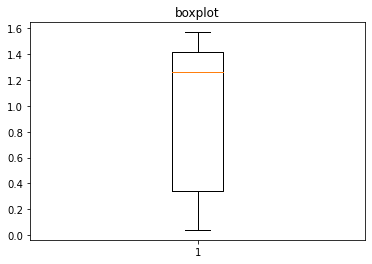

In [154]:
# Five number summary
import matplotlib.pyplot as plt
col = 'reviews_per_month'
example = df[col].head()
mean = np.mean(example)
print("Min: ", df[col].min())
print("Q1 : ", np.percentile(example, 25, interpolation = 'lower'))
print("Q2 : ", np.percentile(example, 50, interpolation = 'lower'))
print("Q3 : ", np.percentile(example, 75, interpolation = 'lower'))
print("Max: ", max(df[col]))
plt.boxplot(example)
plt.title(r'boxplot')
plt.show()

### Number of listings from Sydney and Melbourne


In [138]:
df['location'].value_counts()

sydney       31391
melbourne    20420
Name: location, dtype: int64

### Types of rental properties


In [141]:
df['property_type'].value_counts()

Entire apartment             19869
Private room in apartment     8254
Private room in house         7007
Entire house                  6633
Private room in townhouse     1334
                             ...  
Campsite                         1
Private room in hut              1
Train                            1
Bus                              1
Private room in yurt             1
Name: property_type, Length: 100, dtype: int64

### Number of hosts that have verification on Airbnb


In [142]:
df['host_identity_verified'].value_counts()

t    38702
f    13093
Name: host_identity_verified, dtype: int64

### The first review of all listings


In [152]:
# convert from str to datetime
date = pd.to_datetime(df['first_review'])
print("The first review of all listings: ", date.min())

The first review of all listings:  2009-05-12 00:00:00


In [156]:
df['host_since'].value_counts()

8/1/19     160
13/5/14    152
10/7/13    145
19/8/16    136
22/6/15    121
          ... 
25/8/10      1
23/3/12      1
22/4/10      1
20/2/10      1
5/12/10      1
Name: host_since, Length: 3588, dtype: int64

# Visualisation

        price
0        65.0
1     14315.0
2       470.0
3        79.0
4       100.0
...       ...
9994     65.0
9995    190.0
9996     65.0
9997    129.0
9998    250.0

[9999 rows x 1 columns]
price
50.0     209
60.0     200
70.0     193
75.0     174
80.0     248
85.0     156
90.0     210
95.0     136
100.0    329
110.0    157
120.0    267
150.0    287
180.0    137
200.0    233
250.0    186
300.0    148
dtype: int64


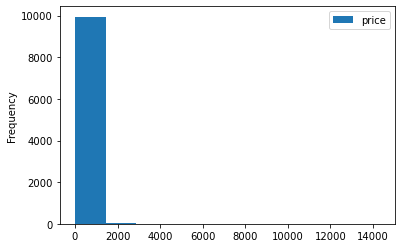

In [76]:
import numpy as np



temp = df[['price']].copy()

temp['price'] = temp['price'].replace('[\$,]', '', regex=True).astype(float)

print(temp)

temp.plot.hist('price')

print(temp.value_counts().head(16).sort_index())



   latitude  longitude location
0 -33.86917  151.22656   Sydney
1 -33.86515  151.19190   Sydney
2 -33.80093  151.26172   Sydney
3 -33.87964  151.21680   Sydney
4 -33.81927  151.23652   Sydney
5 -33.88890  151.27726   Sydney
6 -33.88569  151.26886   Sydney
7 -33.87248  151.22814   Sydney
8 -33.88333  151.19524   Sydney
9 -33.91500  151.14030   Sydney


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

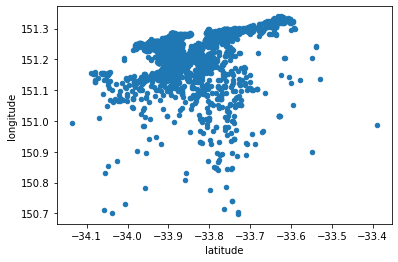

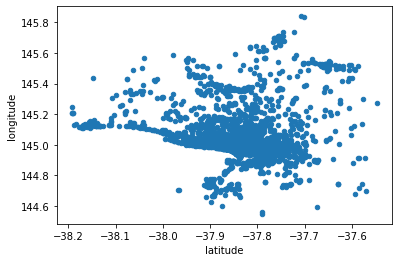

In [102]:
#Location
temp2 = df[['latitude','longitude','location']].copy()
temp2['latitude'] = temp2['latitude'].astype(float)
temp2['longitude'] = temp2['longitude'].astype(float)

print(temp2.head(10))

temp2[temp2['location']=='Sydney'].plot.scatter(x = 'latitude', y ='longitude' )
temp2[temp2['location']=='Melbourne'].plot.scatter(x = 'latitude', y ='longitude' )

# Data pre-processing
